# Data Cleaning and Validation

Clean up the data set below and identify

- five most common journals; 
- total articles for each;
- mean, median and std for cost per articles for each;
- bonus: identify prices paid by subject area

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Data Cleaning

### 1). Load data into dataframe, account for unicode errors, get basic info about the data:

In [2]:
# Load dataframe, account for unicode errors: 
df = pd.read_csv('WELLCOME_APCspend2013_forThinkful.csv', encoding = "ISO-8859-1")
df.head()

,PMID/PMCID,Publisher,Journal title,Article title,COST (£) charged to Wellcome (inc VAT when charged)
0,NaN,CUP,Psychological Medicine,Reduced parahippocampal cortical thickness in ...,£0.00
1,PMC3679557,ACS,Biomacromolecules,Structural characterization of a Model Gram-ne...,£2381.04
2,23043264 PMC3506128,ACS,J Med Chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",£642.56
3,23438330 PMC3646402,ACS,J Med Chem,Orvinols with mixed kappa/mu opioid receptor a...,£669.64
4,23438216 PMC3601604,ACS,J Org Chem,Regioselective opening of myo-inositol orthoes...,£685.88


In [3]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2127 entries, 0 to 2126
Data columns (total 5 columns):
PMID/PMCID                                             1928 non-null object
Publisher                                              2127 non-null object
Journal title                                          2126 non-null object
Article title                                          2127 non-null object
COST (£) charged to Wellcome (inc VAT when charged)    2127 non-null object
dtypes: object(5)
memory usage: 83.2+ KB


(2127, 5)

### 2). Keep only columns we want to work with, rename columns, handle NaNs:

In [4]:
# keep columns we want to work with:
df.drop('PMID/PMCID', axis=1, inplace=True)
df.head()

,Publisher,Journal title,Article title,COST (£) charged to Wellcome (inc VAT when charged)
0,CUP,Psychological Medicine,Reduced parahippocampal cortical thickness in ...,£0.00
1,ACS,Biomacromolecules,Structural characterization of a Model Gram-ne...,£2381.04
2,ACS,J Med Chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",£642.56
3,ACS,J Med Chem,Orvinols with mixed kappa/mu opioid receptor a...,£669.64
4,ACS,J Org Chem,Regioselective opening of myo-inositol orthoes...,£685.88


In [5]:
# rename columns:
df.rename(columns ={'COST (£) charged to Wellcome (inc VAT when charged)': 'Cost'}, inplace=True)
df.head()

,Publisher,Journal title,Article title,Cost
0,CUP,Psychological Medicine,Reduced parahippocampal cortical thickness in ...,£0.00
1,ACS,Biomacromolecules,Structural characterization of a Model Gram-ne...,£2381.04
2,ACS,J Med Chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",£642.56
3,ACS,J Med Chem,Orvinols with mixed kappa/mu opioid receptor a...,£669.64
4,ACS,J Org Chem,Regioselective opening of myo-inositol orthoes...,£685.88


In [6]:
# handle NANs:
#print(df.loc[df['Journal title'].isnull()]) # looks like the "Nan" article is for McMillan
#print(df.loc[df['Publisher'] == 'MacMillan']) # looks like there is only one article by this publisher
# We'll keep the record, but replace Nan with a string:

df.fillna('Not provided',inplace=True)

#df.info()
print(df.isnull().sum())
df.loc[df['Publisher'] == 'MacMillan']

Publisher        0
Journal title    0
Article title    0
Cost             0
dtype: int64


,Publisher,Journal title,Article title,Cost
986,MacMillan,Not provided,Fungal Disease in Britain and the United State...,£13200.00


In [7]:
#df.head(1000)

### 3). Standardize journal titles.

In [8]:
#df['Journal title'].value_counts()

In [9]:
# lowercase all journal titles:
df['Journal title'] = df['Journal title'].str.lower()
df.head()

,Publisher,Journal title,Article title,Cost
0,CUP,psychological medicine,Reduced parahippocampal cortical thickness in ...,£0.00
1,ACS,biomacromolecules,Structural characterization of a Model Gram-ne...,£2381.04
2,ACS,j med chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",£642.56
3,ACS,j med chem,Orvinols with mixed kappa/mu opioid receptor a...,£669.64
4,ACS,j org chem,Regioselective opening of myo-inositol orthoes...,£685.88


In [10]:
# Strip white spaces
df['Journal title'] = df['Journal title'].str.strip()
df.head()

,Publisher,Journal title,Article title,Cost
0,CUP,psychological medicine,Reduced parahippocampal cortical thickness in ...,£0.00
1,ACS,biomacromolecules,Structural characterization of a Model Gram-ne...,£2381.04
2,ACS,j med chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",£642.56
3,ACS,j med chem,Orvinols with mixed kappa/mu opioid receptor a...,£669.64
4,ACS,j org chem,Regioselective opening of myo-inositol orthoes...,£685.88


In [11]:
df['Journal title'].value_counts()


plos one                                                    190
journal of biological chemistry                              53
neuroimage                                                   29
nucleic acids research                                       26
plos genetics                                                24
plos pathogens                                               24
proceedings of the national academy of sciences              22
plos neglected tropical diseases                             20
nature communications                                        19
human molecular genetics                                     19
movement disorders                                           15
brain                                                        14
bmc public health                                            14
journal of neuroscience                                      13
developmental cell                                           12
biochemical journal                     

### 4). Clean up cost values.

In [12]:
# clean up values, change dtype to float:
df['Cost'] = df['Cost'].str.replace('£','').str.replace('$','')
df['Cost'] = df['Cost'].astype(np.float)

df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2127 entries, 0 to 2126
Data columns (total 4 columns):
Publisher        2127 non-null object
Journal title    2127 non-null object
Article title    2127 non-null object
Cost             2127 non-null float64
dtypes: float64(1), object(3)
memory usage: 66.5+ KB


In [13]:
df['Cost'].describe() 

count      2127.000000
mean      24067.339972
std      146860.665559
min           0.000000
25%        1280.000000
50%        1884.010000
75%        2321.305000
max      999999.000000
Name: Cost, dtype: float64

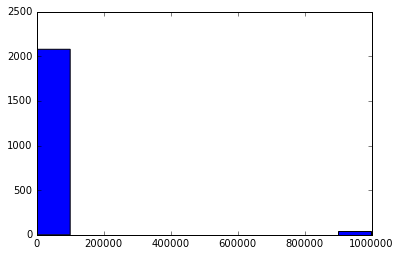

In [14]:
cost_graph = df['Cost']
cost_graph

plt.hist(cost_graph)
plt.show()

In [15]:
# Review outliers such as articles that cost "0.00" and "999,999"
df[df['Cost'] == 0.00] # One article costs "0.00" - could be wither a free article or a mistake
df[df['Cost'] == 999999.00] # Various articles by various publishers cost this much; interesting to investigate why

new_df = df[df['Cost'] == 999999.00]
new_df.head()

publishers = new_df.groupby('Journal title').mean()

publishers # Journals that have articles prices at 999999 -- something to keep in mind when answering questions below.

,Cost
Journal title,
bmc genomics.,999999.0
cell,999999.0
cerebral cortex,999999.0
embo reports,999999.0
experimental cell research,999999.0
expert reviews in molecular medicine,999999.0
frontiers in cognition,999999.0
genetics in medicine,999999.0
hbm jnl human brain mapping,999999.0


## Data Analysis 

### 1). Five most common journals and total articles for each


In [16]:
df.head(50)

journals = df['Journal title'].value_counts()
journals[0:5]

plos one                           190
journal of biological chemistry     53
neuroimage                          29
nucleic acids research              26
plos genetics                       24
Name: Journal title, dtype: int64

### 2). Mean, median and std for cost per articles for each journal.

In [17]:
def journal_stats(x): 

    df_new = df[df['Journal title'] == x]

    mean_cost = df_new['Cost'].mean()
    median_cost = df_new['Cost'].median()
    std_cost = df_new['Cost'].std()

    print('Journal title:',x,'\n Mean:',mean_cost,'\nMedian:',median_cost,'\nStandard deviation:',std_cost,'\n\n')


In [18]:
print(journal_stats('plos one'))
print(journal_stats('journal of biological chemistry'))
print(journal_stats('neuroimage'))
print(journal_stats('nucleic acids research'))
print(journal_stats('plos pathogens'))

Journal title: plos one 
 Mean: 38751.29136842105 
Median: 898.475 
Standard deviation: 189009.51197380977 


None
Journal title: journal of biological chemistry 
 Mean: 20264.63396226415 
Median: 1314.53 
Standard deviation: 137165.48839818343 


None
Journal title: neuroimage 
 Mean: 2215.168275862069 
Median: 2326.43 
Standard deviation: 266.65394691928987 


None
Journal title: nucleic acids research 
 Mean: 1149.0 
Median: 852.0 
Standard deviation: 442.9404474644419 


None
Journal title: plos pathogens 
 Mean: 84775.04458333335 
Median: 1600.52 
Standard deviation: 281885.54408993816 


None
